*  https://www.youtube.com/watch?v=lFq5mYUWEBk -> code basics => ez understand 
* 
* 
* 
* 
*  
* < include a img from binary tree notes.ipynb in data-structures-and algorithm git>

1. what is BT 

A binary tree is a tree data structure where each node has at most two children, referred to as the left child and the right child.

Node Structure
A node in a binary tree contains three parts:

    * Data or Value
    * Pointer or Reference to the left child
    * Pointer or Reference to the right child

representation of a node:

    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

         1
        / \
       2   3
      / \
     4   5

    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)

2. keywords / elements in BT 
    * root - topmost node in a binary tree. It's the starting point for traversing or searching the tree.
    * child - Every node in a binary tree can have at most two children nodes: a left child and a right child.
    * parent - A node is called a parent if it has at least one child node.
    * ancestor - An ancestor of a node N is any node on the path from the root to N, excluding N itself.
    * leaf node - a node that does not have any children.
    * sub tree -  is a portion of a binary tree that can itself be considered as a binary tree. It consists of a node in the original tree and all of its descendants.
    * height 
    * lvl - The level of a node is its distance from the root. The root is at level 0, its children are at level 1, their children are at level 2, and so on.

        - Level refers to the relative position or depth of a node within the tree structure, starting from the root at level 0.
        
        - Helps in understanding and visualizing the relative positions of nodes.
        
        - Aids in solving problems related to finding ancestors, descendants, or nodes at a specific depth.
        
    * height - The height of a binary tree is the length of the longest path from the root node down to the farthest leaf node.

        - Height is a measure of the tree's overall structure, indicating how tall the tree is from its root to the deepest leaf node.
        
        - Helps in analyzing and understanding the tree's balance.
        
        - Useful for determining time complexity of tree operations.
        
        

3. types of BT 
    * full BT 
    * complete BT 
    * perfect BT 
    * balanced BT 
    * degenerate / pathological BT 
    * 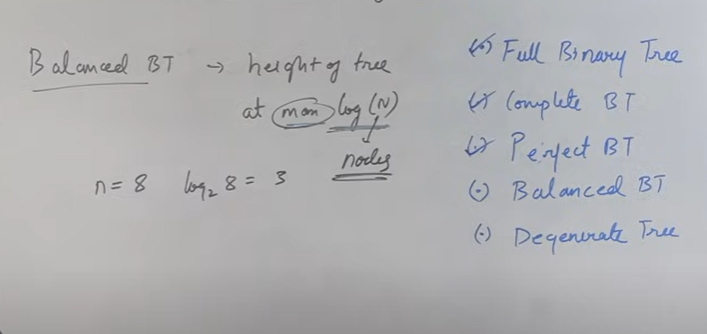

4. operations 
    * traversals (BFS, DFS[inorder, pre, post])
    * insert (root, node, leaf node)
    * delete(root, node, leaf node)
    * find min max value in tree 

1. BT rep 

    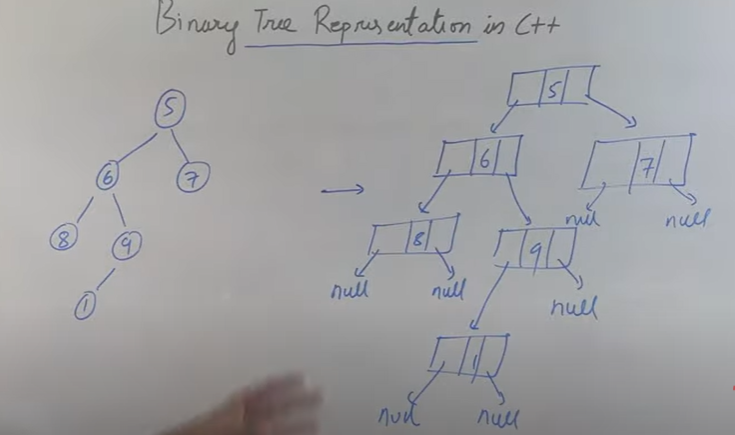

2. samplet create (Node structure)

    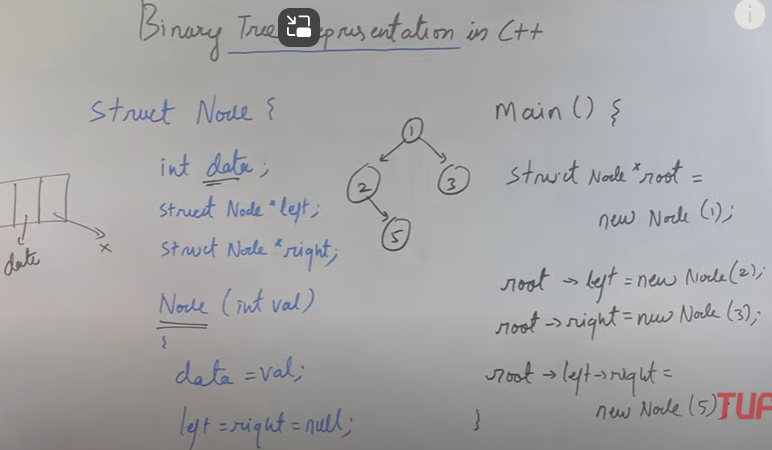

1. Pre order 

    * TC -> O(N)
    * SC -> O(N)

    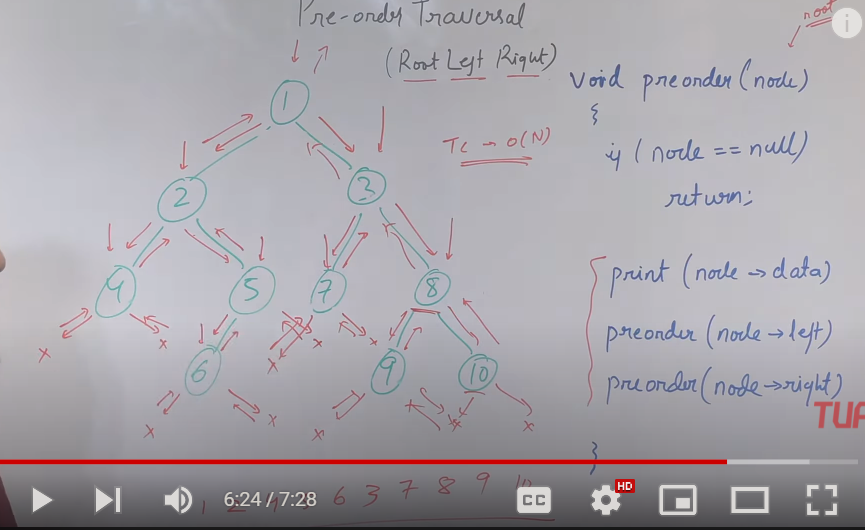

2. In order 

    * 
    * 

    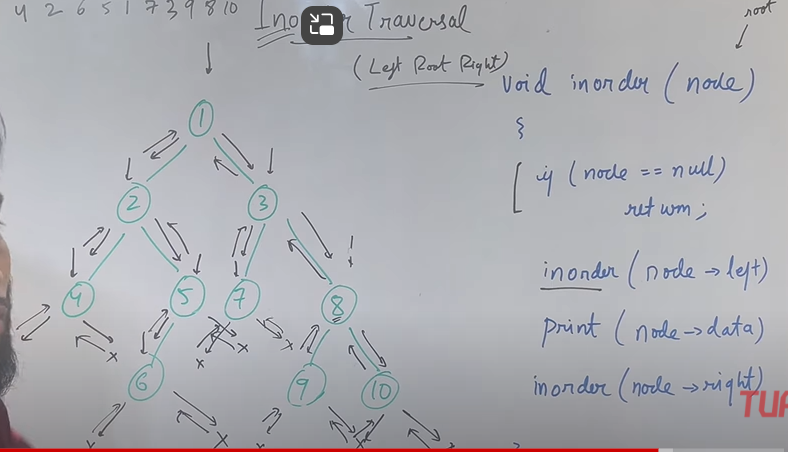

3. Post order 

    * 
    * 

    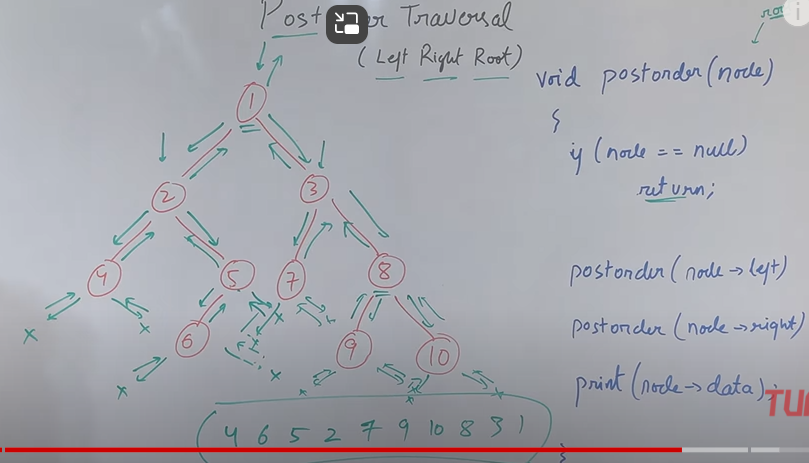

4. level order (BFS)

    * 
    * 

    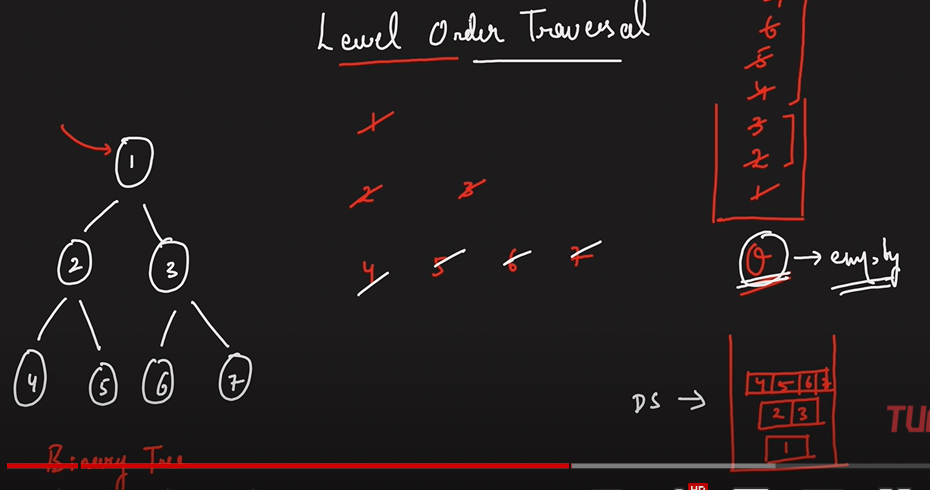

    L8 - https://www.youtube.com/watch?v=EoAsWbO7sqg&list=PLgUwDviBIf0q8Hkd7bK2Bpryj2xVJk8Vk&index=9 (Refer once and opt chk ?)

In [8]:
from queue import Queue,LifoQueue

class Node:
    def __init__(self,value):
        self.value=value
        self.left=None
        self.right=None

class Btree:
    def __init__(self):
        self.root=None

    #this is lvl order travesal/ BFS too
    def buildtree(self,l):
        if len(l)==0 or len(l)==1:
            return l
        else:
            q=Queue()
            self.root=Node(l[0])
            q.put(self.root)#l[0]
            for i in range(1,len(l),2):
                # print(f"--------{i}th iter---------")
                prev_ele=q.get()#at 1st itr u have head 
                if l[i]:
                    prev_ele.left=Node(l[i])
                    q.put(prev_ele.left)#put in q
                    # print(l[i])
                if l[i+1]:#NOTE few chks needed to be done here (have to chk if there is a element here, might not have since prev may be the last ele)
                    prev_ele.right=Node(l[i+1])
                    q.put(prev_ele.right)
                    # print(l[i+1])
            #at last the queue is left with all the -> leaf elements 
            
    def inorder(self,node):# L Root Right 
        if node is None:return 
        self.inorder(node.left)
        print(node.value,end=" ")# ans.append(node.value)
        self.inorder(node.right)
        
    def preorder(self,node):# Root L R
        if node is None:return 
        print(node.value,end=" ")
        self.preorder(node.left)
        self.preorder(node.right)

    def postorder(self,node):#L R Root 
        if node is None:return 
        self.postorder(node.left)
        self.postorder(node.right)
        print(node.value,end=" ")

    #Recursive => TC:O(N), SC:O(N)[recurive stack space]
    #Iterative => TC:O(N), SC:O(1)[only auxillary space] => BEST 
    def preorder_itr(self,node):
        if not self.root:#node
            return None 
        else:
            #push root to stk 
            s=LifoQueue()#stk 
            s.put(self.root)#node

            while s.qsize(): #while stk is not empty 
                prev_ele=s.get()
                print(prev_ele.value,end=" ")
                if prev_ele.right:
                    s.put(prev_ele.right)
                if prev_ele.left:
                    s.put(prev_ele.left)

    def inorder_itr(self,node):
        if not self.root:
            return None
        else:
            
            #here cant use same like prev element appr coz -> u neeed to pop everytime to get the prev ele , in this case we can pop but will print only later, thus not that appr 
            s=LifoQueue()
            curr=self.root 
            while curr or s.qsize(): #coz at first stk is empty this to pass that we include curr == True contd, which is true as initially curr is root itself 
                if curr:
                    s.put(curr)
                    curr=curr.left
                else:
                    curr=s.get()
                    print(curr.value,end=" ")

                    curr=curr.right

            """
            s=LifoQueue()
            curr=self.root 
            while True:
                if curr:
                    s.put(curr)
                    s=s.left
                else:
                    if not s.qsize():
                        break;
                    curr=s.get()
                    print(curr.value,end=" ")
                    curr=curr.right
                """

#TC O(N), SC O(2N)
    def postorder_itr_2s(self,node):
        s1=LifoQueue()
        s2=LifoQueue()
        if not self.root:
            return None
        else:
            s1.put(self.root)#cant simply put the value instead put node on s1, but can directly put val on s2 as we only intedn to print it and not traverse it 

            while s1.qsize():
                curr=s1.get()
                s2.put(curr.value)
                if curr.left:
                    s1.put(curr.left) 
                if curr.right:
                    s1.put(curr.right)
            #now pop and print the stk 
            while s2.qsize():
                print(s2.get(),end=" ")
        
    #one stk soln -> 
    def postorder_itr_1s(self,node):
        #L R Root => 
        pass 

        
if __name__=="__main__":
    bt1=Btree()
    bt1.buildtree(l=[1,None,2,3,4,5,6,None,7])
    print("\n-----INORDER-----")#[1,5,3,6,2,4,7]
    bt1.inorder(bt1.root)
    print()
    bt1.inorder_itr(bt1.root)
    
    print("\n-----PREORDER-----")#[1,2,3,5,6,4,7]
    bt1.preorder(bt1.root)
    print()
    bt1.preorder_itr(bt1.root)

    print("\n-----POSTORDER-----")#[5,6,3,7,4,2,1]
    bt1.postorder(bt1.root)
    print()
    bt1.postorder_itr_2s(bt1.root)


-----INORDER-----
1 5 3 6 2 4 7 
1 5 3 6 2 4 7 
-----PREORDER-----
1 2 3 5 6 4 7 
1 2 3 5 6 4 7 
-----POSTORDER-----
5 6 3 7 4 2 1 
5 6 3 7 4 2 1 

In [19]:
l=[1,None,2,3,4,5,6,None,7]
from queue import Queue
q=Queue()

q.put(l[0])
q.put(l[1])
q.put(l[2])
q.put(l[3])

print(q.queue)

ele=q.get()
print(ele)
print(q.queue)

deque([1, None, 2, 3])
1
deque([None, 2, 3])


1. iterative Pre 

    * TC -> O(N)
    * SC -> O(N) => what is the worst case ??? {markd blw and why is that ??}

    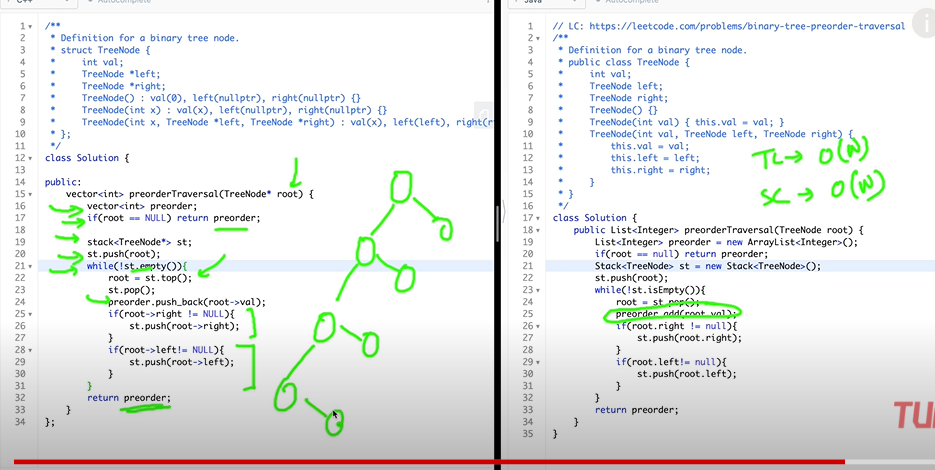


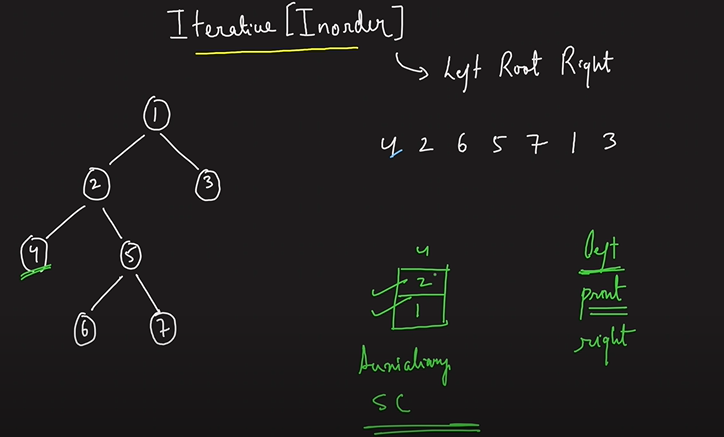

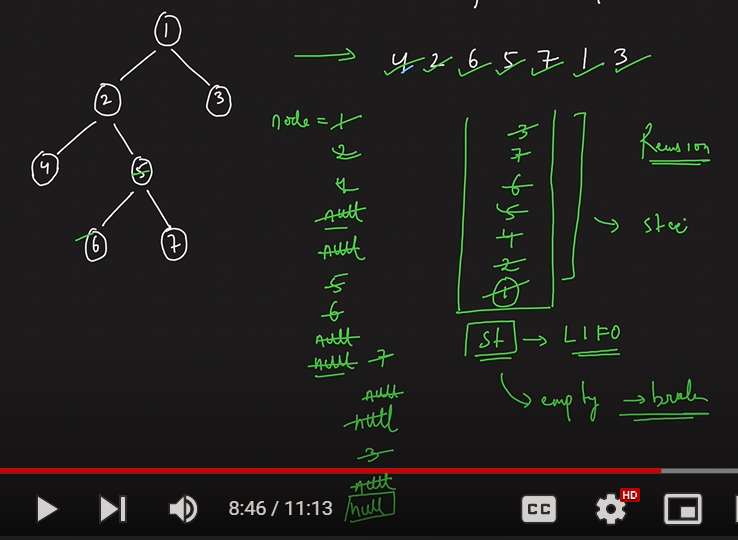

In [22]:
class BST:

    def __init__(self,data):
        self.data=data
        self.left=None
        self.right=None
  
    def addchild(self,data):
    #if already pressnt -> dont add so return  
        if data==self.data:
            return 
    
        elif (data<self.data):#root greater than val -> add to left sub tree
       
          #if left node has a left child -> then add a child to it 
            if self.left:
                self.left.addchild(data)

          #if no vals already present 
            else:
                self.left=BST(data)

        #val > root -> add to right ST 
        else:

            if self.right:
                self.right.addchild(data)
      
            else:
                self.right=BST(data)
    
    
    def search(self,val):
        if self.data==val:
            return True 
        
        if val< self.data:
            if self.left:
                return self.left.search(val)
            else:#not presnt 
                return False
            
        if val>self.data:
            if self.right:
                self.right.search(val)
            else:
                return False 
    
    
    def inorder_traversal(self):
        elements=[]

      #start from left note 
        if self.left:
            elements+=self.left.inorder_traversal()
      
      
        elements.append(self.data)

        if self.right:
            elements+=self.right.inorder_traversal()

        return elements 
    
    def preorder_traversal(self):
        elements=[]
        
        elements.append(self.data)
        
        if self.left:
            elements+=self.left.preorder_traversal()
            
        if self.right:
            elements+=self.right.preorder_traversal()
            
        return elements

    def postorder_traversal(self):
        elements=[]
        elements.append(self.data)
            
        if self.right:
            elements+=self.right.postorder_traversal()
        if self.left:
            elements+=self.left.postorder_traversal()
     
        return elements
    
    def find_min(self):
        
        if self.left==None:
            return self.data
        return self.left.find_min()
    
    def find_max(self):
        if self.right==None:
            return self.data
        return self.right.find_max()
    
    def calculate_sum(self):
        
        leftsum,rightsum=0,0
        if self.left:
            leftsum+= self.left.calculate_sum()
            
        if self.right:
            rightsum+=self.right.calculate_sum()
        print("ls",leftsum,"rs",rightsum,"nv",self.data)
        return leftsum+rightsum+self.data
        
    
  # builder mtd 
def buildtree(elements):
        
    root=BST(elements[0])
    for i in range(2,len(elements)):
            root.addchild(elements[i])
        
    return root

if __name__=="__main__":
    
    nums_tree=buildtree([17, 4, 1, 20, 9, 23, 18, 24])
    
    print("org tree--",[17, 4, 1, 20, 9, 23, 18, 24])
    print("inorder--",nums_tree.inorder_traversal())
    print("pre-order--",nums_tree.preorder_traversal())
    print("post-order--",nums_tree.postorder_traversal())
    
    
    print("searching --",nums_tree.search(1))

    print("min in tree--",nums_tree.find_min())
    
    print("calc sum --",nums_tree.calculate_sum())

org tree-- [17, 4, 1, 20, 9, 23, 18, 24]
inorder-- [1, 9, 17, 18, 20, 23, 24]
pre-order-- [17, 1, 9, 20, 18, 23, 24]
post-order-- [17, 20, 23, 24, 18, 1, 9]
searching -- True
min in tree-- 1
ls 0 rs 0 nv 9
ls 0 rs 9 nv 1
ls 0 rs 0 nv 18
ls 0 rs 0 nv 24
ls 0 rs 24 nv 23
ls 18 rs 47 nv 20
ls 10 rs 85 nv 17
calc sum -- 112


1. find_min(): finds minimum element in entire binary tree
2. find_max(): finds maximum element in entire binary tree
3. calculate_sum(): calcualtes sum of all elements
4. post_order_traversal(): performs post order traversal of a binary tree
5. pre_order_traversal(): perofrms pre order traversal of a binary tree